In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

# Send an HTTP request to the URL
url = "https://www.espncricinfo.com/records/team/bowling-most-wickets-career/bangladesh-25/one-day-internationals-2"
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

In [2]:
json_obj = json.loads(soup.find("script", {"id": "__NEXT_DATA__"}).text)
A = json_obj['props']
B = A['appPageProps']
C = B['data']
D = C['data']
E = D['content']
F = E['tables']
df = pd.DataFrame(F)

In [3]:
X = pd.DataFrame(df.rows.to_dict()[0])

In [4]:
def cricket(joi):
  tem = []
  U = pd.DataFrame(joi)
  for i in range(len(U)):
    V = U.iloc[i].to_dict()
    M = V['items']
    tem.append(M['value'])
  return tem

In [5]:
joi_list = []
for i in range(len(X)):
  joi_list.append(cricket(X.iloc[i].to_dict()))

In [6]:
colunms = ['Player_name'  , 'Player_contry','Span','Mat','Inns','Balls','Overs','Mdns','Runs','Wkts','BBI','Ave','Econ','SR','4','5']
original_data = pd.DataFrame(joi_list, columns = colunms)
original_data.head()

,Player_name,Player_contry,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,Shakib Al Hasan,Shakib Al Hasan (BAN),2006-2023,240,234,12200,2033.2,100,9031,308,5/29,29.32,4.44,39.61,10,4
1,Mashrafe Mortaza,Mashrafe Mortaza (BAN),2001-2020,218,218,10827,1804.3,122,8785,269,6/26,32.65,4.86,40.24,7,1
2,Abdur Razzak,Abdur Razzak (BAN),2004-2014,153,152,7965,1327.3,70,6065,207,5/29,29.29,4.56,38.47,5,4
3,Mustafizur Rahman,Mustafizur Rahman (BAN),2015-2023,93,92,4473,745.3,31,3787,156,6/43,24.27,5.07,28.67,5,5
4,Rubel Hossain,Rubel Hossain (BAN),2009-2021,104,102,4678,779.4,29,4427,129,6/26,34.31,5.67,36.26,7,1


In [8]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ca/4a/49ceaa60945f2e0077c25117dd99c7e6efdea9cc970787d0637a36e39014/wordcloud-1.9.2-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   -------- ------------------------------- 30.7/153.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 153.3/153.3 kB 1.5 MB/s eta 0:00:00


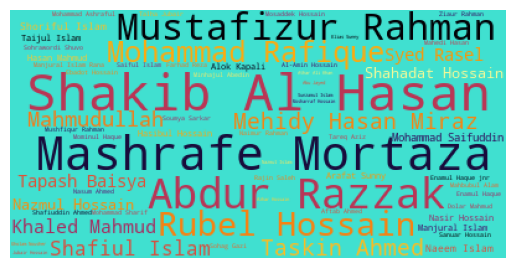

In [9]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

d = {w: f for w, f in
     zip(original_data.Player_name,
         original_data.Wkts)}
wordcloud = WordCloud(background_color='turquoise', colormap='inferno', prefer_horizontal=1)
wordcloud.generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

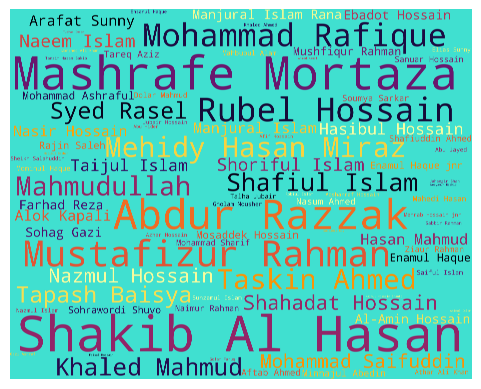

In [10]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Your data dictionary
d = {w: f for w, f in zip(original_data.Player_name, original_data.Wkts)}

# Create a WordCloud object with specified settings
wordcloud = WordCloud(background_color='turquoise', colormap='inferno', prefer_horizontal=1, width=14537, height=11650, mode='RGBA')

# Generate word cloud from the frequencies
wordcloud.generate_from_frequencies(frequencies=d)

# Save the word cloud as a PNG image with specific settings
wordcloud.to_file('wordcloud.png')

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


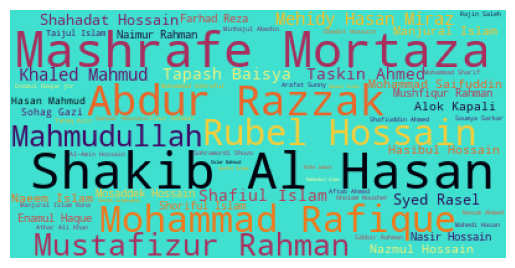

In [11]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

d = {w: f for w, f in
     zip(original_data.Player_name,
         original_data.Runs)}
wordcloud = WordCloud(background_color='turquoise', colormap='inferno', prefer_horizontal=1)
wordcloud.generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()